In [118]:
# importa arquivos
import nltk

from nltk.corpus import PlaintextCorpusReader
# corpus - antes da pandemia
corpus_ap = 'C:\\Users\\loren\\OneDrive\\Desktop\\TRABALHO PILN\\corpus\\antes_pandemia'
# textos - antes da pandemia
textos_ap = PlaintextCorpusReader(corpus_ap, '.*')

# corpus - depois da pandemia
corpus_dp = 'C:\\Users\\loren\\OneDrive\\Desktop\\TRABALHO PILN\\corpus\\depois_pandemia'
# textos - depois da pandemia
textos_dp = PlaintextCorpusReader(corpus_dp, '.*')


In [119]:
# funções de pré processamento

from nltk import word_tokenize
import re
nltk.download('punkt')

# função para tokenizar (transformar string em lista de palavras)

# função para normalizar texto:
# convertendo todas as palavras para lower case
# substituindo acentos, números e outros caracteres especiais


def normalizar(arquivo: str):
    text = open(arquivo, encoding="utf-8").read().lower()
    text = re.sub('[âãáàä]', 'a', text)
    text = re.sub('[êèéë]', 'e', text)
    text = re.sub('[îíìï]', 'i', text)
    text = re.sub('[ôõòóö]', 'o', text)
    text = re.sub('[ûúùü]', 'u', text)
    text = re.sub('[ç]', 'c', text)
    return text

# retira types com numerais e pontuação e tokens indesejados


def limpa_tokenizacao(tokens_raw: list[str]):

    dicionario_indesejados = ['a', 'e', 'i', 'o', 'u', 'na', 'no', 'da', 'de', 'do', 'os', 'as', 'aos', 'um', 'uma', 'seu', 'sua', 'em', ' por', 'pelo', 'pela', 'dos',
                              'nos', 'pelos ', 'das', 'nas', 'pelas', 'dum', 'num', 'duma', 'numa', 'uns', 'duns', 'nuns', 'umas', 'uns', 'dumas','numas', 'ante', 'apos', 
                              'ate', 'com', 'conforme', 'contra', 'de', 'desde', 'durante', 'excepto', 'entre', 'mediante','para', 'perante', 'por', 'sem', 'sob', 'sobre', 
                              'tras', 'como', 'que', 'nao', 'ou', 'foi', 'das', 'alem', 'sao', 'in', 'and', 'para','j', 'foram', 'of', 'seus', 'suas', 'ao', 'mais', 'se', 'ser', 
                              'ter', 'podem', 'ha', 'este', 'tal', 'pode', 'sido', 'sendo', 'esta', 'essa','estes', 'mas','ha', 'esses', 'esse', 'estas', 'et', 'al', 'ja', 'estao', 
                              'tem', 'destes', 'destas', 'desses', 'dessas', 'desse', 'dessa', 
                              'deste', 'desta', 'aquele', 'aqueles','aquela', 'aquelas', 'assim', 'tambem', 'disto', 'disso', 'contudo', 'porem', 'meu', 'minha', 'meus', 'minhas', 
                              'teu', 'tua', 'teus', 
                              'tuas', 'seu', 'sua', 'seus', 'suas', 'nosso', 'nossa', 'nossos', 'nossas', 'vosso', 'vossa', 'cols',
                              'vossos', 'vossas', 'seu', 'sua', 'seus', 'suas', 'o', 'a', 'os', 'as', 'mesmo', 'mesma', 'mesmos', 'mesmas', 'próprio', 'própria', 'próprios',
                              'próprias', 'tal', 'tais', 'semelhante', 'semelhantes',
                              'que', 'quem', 'qual', 'quais', 'quanto', 'quanta', 'quantos', 'quantas',
                              'que', 'quem', 'onde', 'o qual', 'a qual', 'os quais', 'as quais', 'cujo', 'cuja', 'cujos', 'cujas', 'quanto', 'quanta', 'quantos', 'quantas',
                              'alguém', 'ninguém', 'outrem', 'tudo', 'nada', 'cada', 'algo', 'algum', 'algumas', 'nenhuns', 'nenhuma', 'todo', 'todos', 'outra', 'outras',
                              'muito', 'muita', 'pouco', 'poucos', 'certo', 'certa',
                              'vários', 'várias', 'tanto', 'tantos', 'quanta', 'quantas', 'qualquer', 'quaisquer', 'bastante', 'bastantes']

    return [w for w in tokens_raw if w.isalpha() and w not in dicionario_indesejados]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\loren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [120]:
# importa arquivos

import nltk
from nltk.corpus import PlaintextCorpusReader

# antes da pandemia arquivos separados
arquivos_antes_pandemia_raw = {'epidemiologia': 'C:\\Users\\loren\\OneDrive\\Desktop\\TRABALHO PILN\\Corpus\\antes_pandemia\\epidemiologia.txt',
                               'terapia': 'C:\\Users\\loren\\OneDrive\\Desktop\\TRABALHO PILN\\Corpus\\antes_pandemia\\terapia.txt',
                               'tratamento': 'C:\\Users\\loren\\OneDrive\\Desktop\\TRABALHO PILN\\Corpus\\antes_pandemia\\tratamento.txt'}

arquivos_antes_pandemia = {
    key: limpa_tokenizacao(word_tokenize(normalizar(value)))
    for key, value in arquivos_antes_pandemia_raw.items()
}

# antes da pandemia arquivos unificados
arquivos_antes_pandemia_unificados = sum(arquivos_antes_pandemia.values(), [])

# durante da pandemia arquivos separados
arquivos_durante_pandemia_raw = {'ansiedade': 'C:\\Users\\loren\\OneDrive\\Desktop\\TRABALHO PILN\\Corpus\\depois_pandemia\\ansiedade.txt',
                                 'disturbios': 'C:\\Users\\loren\\OneDrive\\Desktop\\TRABALHO PILN\\Corpus\\depois_pandemia\\disturbios.txt',
                                 'saude': 'C:\\Users\\loren\\OneDrive\\Desktop\\TRABALHO PILN\\Corpus\\depois_pandemia\\saude.txt'}

arquivos_durante_pandemia = {
    key: limpa_tokenizacao(word_tokenize(normalizar(value)))
    for key, value in arquivos_durante_pandemia_raw.items()
}

# durante da pandemia arquivos unificados
arquivos_durante_pandemia_unificados = sum(
    arquivos_durante_pandemia.values(), [])

In [121]:
# cria dicionário de distribuição de frequência para cada chave (arquivo)
arquivos_antes_pandemia_fdists = {
    key: nltk.FreqDist(value)
    for key, value in arquivos_antes_pandemia.items()
}

arquivos_durante_pandemia_fdists = {
    key: nltk.FreqDist(value)
    for key, value in arquivos_durante_pandemia.items()
}

# cria dicionário de distribuição de frequência de tokens para cada chave (arquivo)
arquivos_antes_pandemia_fdists_sort = {
    key: dict(value.most_common(100))
    for key, value in arquivos_antes_pandemia_fdists.items()
}

arquivos_durante_pandemia_fdists_sort = {
    key: dict(value.most_common(100))
    for key, value in arquivos_durante_pandemia_fdists.items()
}

# cria distribuição de frequência para conjunto de arquivos
arquivos_antes_pandemia_unificados_fdist = nltk.FreqDist(arquivos_antes_pandemia_unificados)

arquivos_durante_pandemia_unificados_fdist = nltk.FreqDist(arquivos_durante_pandemia_unificados)

# cria distribuição de frequência para tokens mais comuns
arquivos_antes_pandemia_unificados_fdist_sort = dict(arquivos_antes_pandemia_unificados_fdist.most_common(100))

arquivos_durante_pandemia_unificados_fdist_sort = dict(arquivos_durante_pandemia_unificados_fdist.most_common(100))

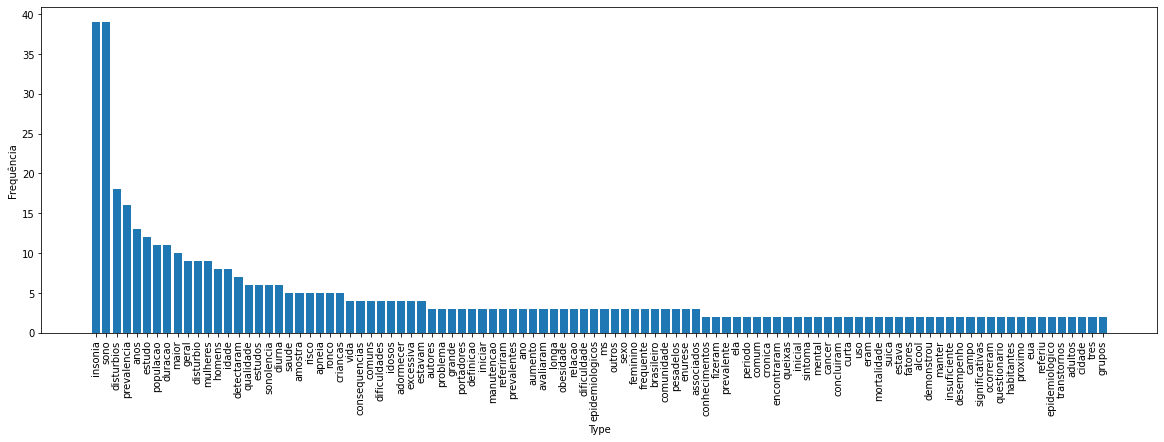

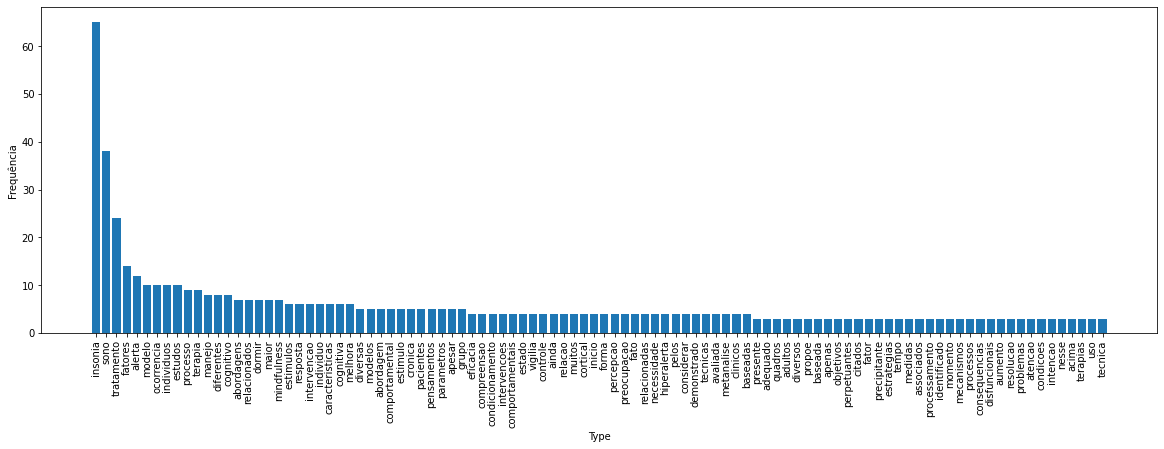

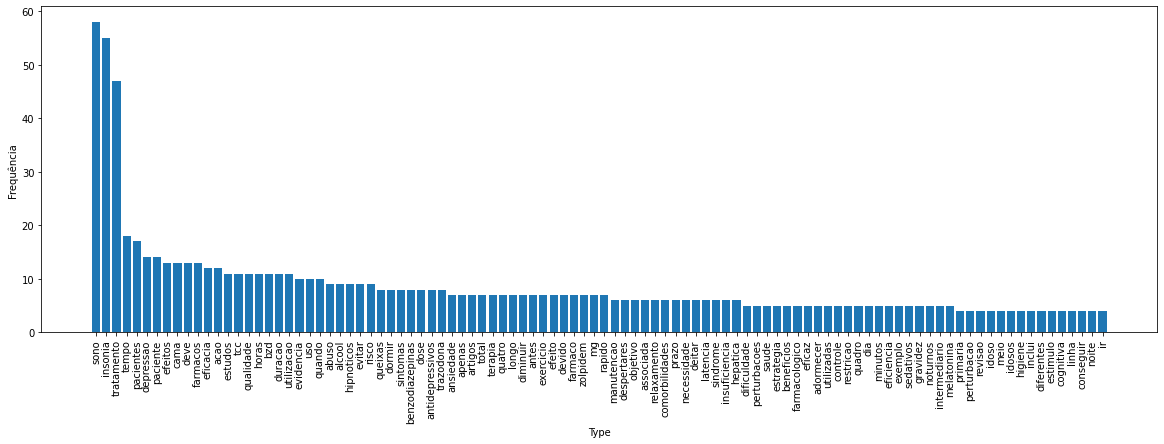

In [122]:
#Mostra o gráfico com a distribuição das palavras de arquivos antes da pandemia
import numpy as np
import matplotlib.pyplot as plt

for key,fdist_sort in arquivos_antes_pandemia_fdists_sort.items():

    x_pos = np.arange(len(fdist_sort))
    f=plt.figure()
    f.set_figwidth(20)
    f.set_figheight(6)
    plt.bar(x_pos,fdist_sort.values())
    plt.xticks(x_pos, fdist_sort.keys(), rotation=90)
    plt.ylabel('Frequência')
    plt.xlabel('Type')
    plt.show()


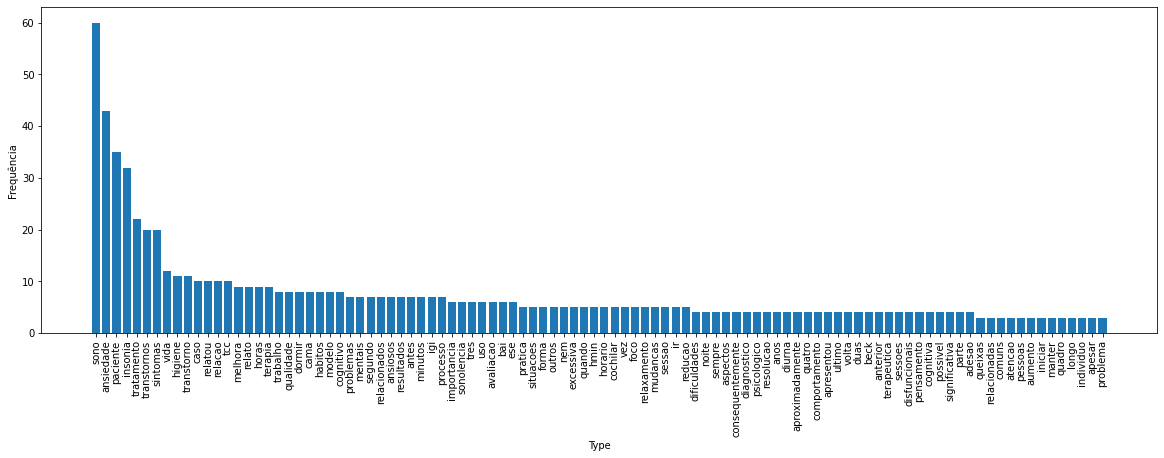

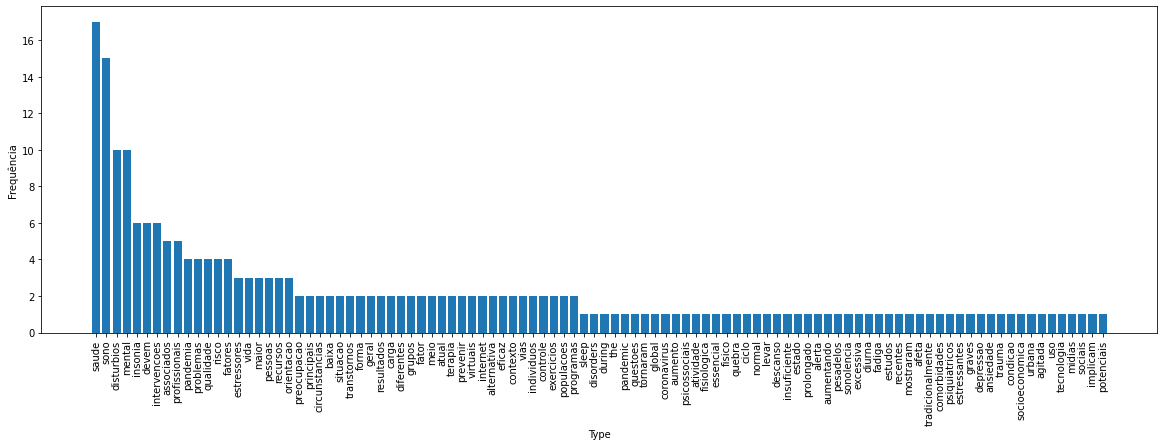

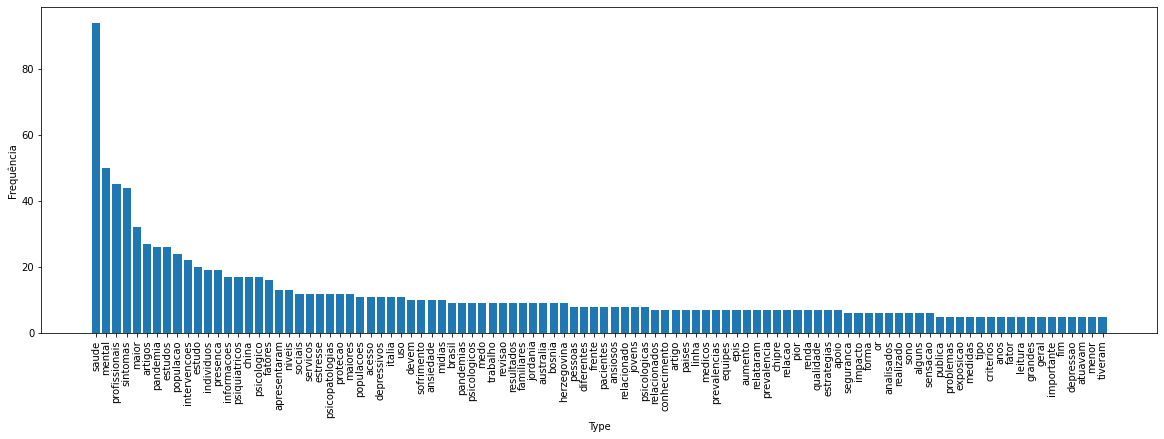

In [123]:
#Mostra o gráfico com a distribuição das palavras de arquivos durante a pandemia
import numpy as np
import matplotlib.pyplot as plt

for key,fdist_sort in arquivos_durante_pandemia_fdists_sort.items():

    x_pos = np.arange(len(fdist_sort))
    f=plt.figure()
    f.set_figwidth(20)
    f.set_figheight(6)
    plt.bar(x_pos,fdist_sort.values())
    plt.xticks(x_pos, fdist_sort.keys(), rotation=90)
    plt.ylabel('Frequência')
    plt.xlabel('Type')
    plt.show()

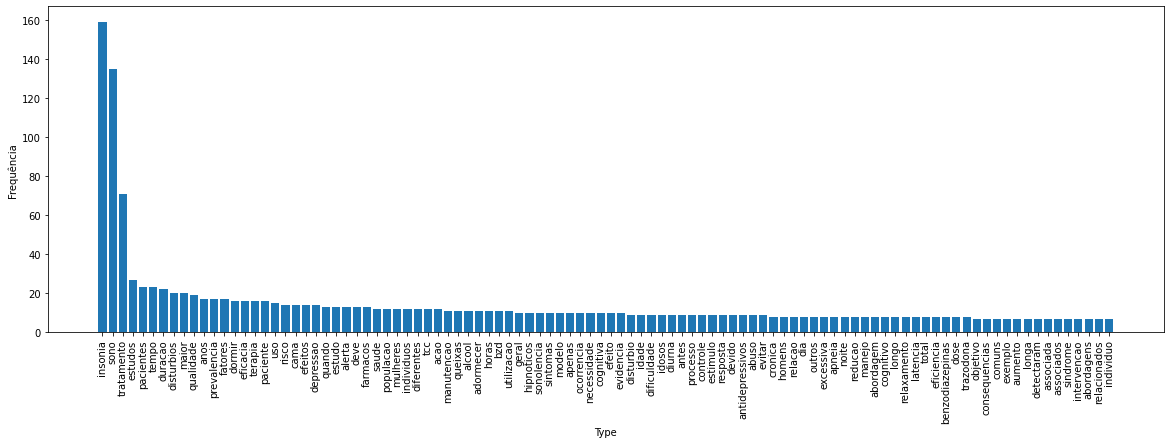

In [124]:
#Mostra o gráfico com a distribuição das palavras de arquivos unificados antes da pandemia
import numpy as np
import matplotlib.pyplot as plt

x_pos = np.arange(len(arquivos_antes_pandemia_unificados_fdist_sort))
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(6)
plt.bar(x_pos,arquivos_antes_pandemia_unificados_fdist_sort.values())
plt.xticks(x_pos, arquivos_antes_pandemia_unificados_fdist_sort.keys(), rotation=90)
plt.ylabel('Frequência')
plt.xlabel('Type')
plt.show()

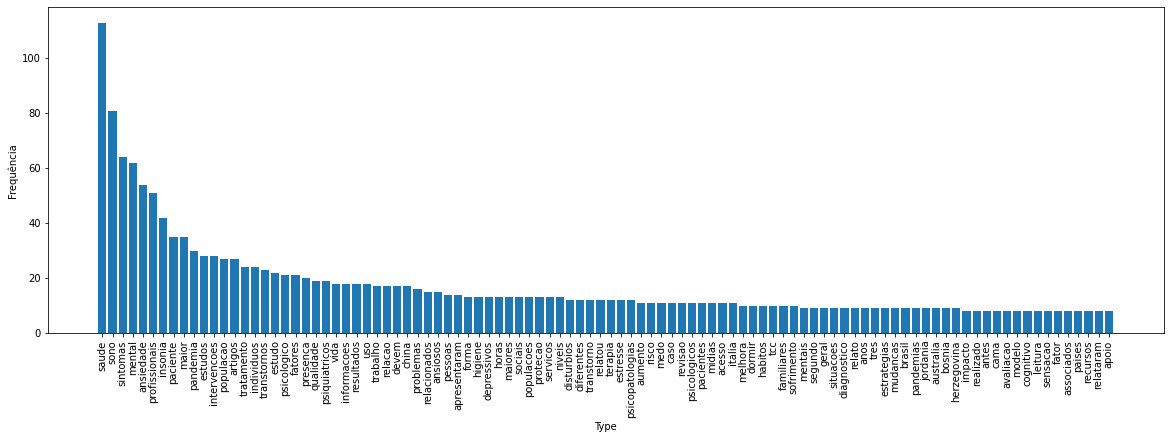

In [125]:
#Mostra o gráfico com a distribuição das palavras de arquivos unificados durante da pandemia
import numpy as np
import matplotlib.pyplot as plt

x_pos = np.arange(len(arquivos_durante_pandemia_unificados_fdist_sort))
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(6)
plt.bar(x_pos,arquivos_durante_pandemia_unificados_fdist_sort.values())
plt.xticks(x_pos, arquivos_durante_pandemia_unificados_fdist_sort.keys(), rotation=90)
plt.ylabel('Frequência')
plt.xlabel('Type')
plt.show()

In [147]:
# intersecção de palavras entre textos

def interseccao_de_chaves_de_dicionarios(a: dict, b: dict, c: dict):
    return set(a.keys()) & set(b.keys()) & set(c.keys())


antes = interseccao_de_chaves_de_dicionarios(
    arquivos_antes_pandemia_fdists_sort['epidemiologia'], arquivos_antes_pandemia_fdists_sort['terapia'], arquivos_antes_pandemia_fdists_sort['tratamento'])

durante = interseccao_de_chaves_de_dicionarios(
    arquivos_durante_pandemia_fdists_sort['ansiedade'], arquivos_durante_pandemia_fdists_sort['disturbios'], arquivos_durante_pandemia_fdists_sort['saude'])

def interseccao_de_chaves_de_dicionarios_unificados(a: dict, b: dict):
    return set(a.keys()) & set(b.keys())

interseccao_antes_durante = interseccao_de_chaves_de_dicionarios_unificados(
    arquivos_antes_pandemia_unificados_fdist_sort, arquivos_durante_pandemia_unificados_fdist_sort)

interseccao_antes_durante

{'anos',
 'antes',
 'associados',
 'aumento',
 'cama',
 'cognitivo',
 'diferentes',
 'disturbios',
 'dormir',
 'estudo',
 'estudos',
 'fatores',
 'geral',
 'horas',
 'individuos',
 'insonia',
 'maior',
 'modelo',
 'paciente',
 'pacientes',
 'populacao',
 'qualidade',
 'relacao',
 'relacionados',
 'risco',
 'saude',
 'sintomas',
 'sono',
 'tcc',
 'terapia',
 'tratamento',
 'uso'}

In [150]:
# diferença de palavras entre textos

def diferenca_de_chaves_de_dicionarios_unificados(a: dict, b: dict):
    return set(a.keys()) - set(b.keys())

diferenca_antes_durante = diferenca_de_chaves_de_dicionarios_unificados(
    arquivos_durante_pandemia_unificados_fdist_sort, arquivos_antes_pandemia_unificados_fdist_sort)

diferenca_antes_durante

{'acesso',
 'ansiedade',
 'ansiosos',
 'apoio',
 'apresentaram',
 'artigos',
 'australia',
 'avaliacao',
 'bosnia',
 'brasil',
 'caso',
 'china',
 'depressivos',
 'devem',
 'diagnostico',
 'estrategias',
 'estresse',
 'familiares',
 'fator',
 'forma',
 'habitos',
 'herzegovina',
 'higiene',
 'impacto',
 'informacoes',
 'intervencoes',
 'italia',
 'jordania',
 'leitura',
 'maiores',
 'medo',
 'melhora',
 'mentais',
 'mental',
 'midias',
 'mudancas',
 'niveis',
 'paises',
 'pandemia',
 'pandemias',
 'pessoas',
 'populacoes',
 'presenca',
 'problemas',
 'profissionais',
 'protecao',
 'psicologico',
 'psicologicos',
 'psicopatologias',
 'psiquiatricos',
 'realizado',
 'recursos',
 'relataram',
 'relato',
 'relatou',
 'resultados',
 'revisao',
 'segundo',
 'sensacao',
 'servicos',
 'situacoes',
 'sociais',
 'sofrimento',
 'trabalho',
 'transtorno',
 'transtornos',
 'tres',
 'vida'}

In [145]:
import pandas as pd

def pandaize(fdist: nltk.FreqDist):
    #num_types = len(set(fdist.keys()))
    num_types = 11
    fdist_sort = dict(fdist.most_common(num_types))
    # cria uma lista com as posições no ranking
    ranks = list(range(1, num_types+1))
    produto = np.array(list(fdist_sort.values())) * np.array(ranks)
    return pd.DataFrame(list(zip(fdist_sort.keys(), fdist_sort.values(), ranks, produto)), columns=['type', 'Frequência (f)', 'Rank (r)', 'f*r'])


In [146]:

pandaize(arquivos_antes_pandemia_unificados_fdist)

,type,Frequência (f),Rank (r),f*r
0,insonia,159,1,159
1,sono,135,2,270
2,tratamento,71,3,213
3,estudos,27,4,108
4,pacientes,23,5,115
5,tempo,23,6,138
6,duracao,22,7,154
7,disturbios,20,8,160
8,maior,20,9,180
9,qualidade,19,10,190


In [142]:

pandaize(arquivos_durante_pandemia_unificados_fdist)

,type,Frequência (f),Rank (r),f*r
0,saude,113,1,113
1,sono,81,2,162
2,sintomas,64,3,192
3,mental,62,4,248
4,ansiedade,54,5,270
5,profissionais,51,6,306
6,insonia,42,7,294
7,paciente,35,8,280
8,maior,35,9,315
9,pandemia,30,10,300


In [158]:
text = nltk.Text(arquivos_antes_pandemia_unificados)
for token in interseccao_antes_durante:
    print(text.concordance(token))

Displaying 14 of 14 matches:
uso hipnoticos eram preditores maior risco mortalidade estudo populacional long
nsonia autores correlacionaram maior risco insonia sujeitos moravam proximo via
idade dormidores longos curtos maior risco qualidade sono ruim associada maior 
 qualidade sono ruim associada maior risco independente duracao sono independen
a fadiga aumentam significativamente risco acidentes trabalho domesticos transi
s hipnoticos doente devera informado risco habituacao risco sindrome privacao r
te devera informado risco habituacao risco sindrome privacao risco toxicidade i
o habituacao risco sindrome privacao risco toxicidade ingestao concomitante alc
gestao concomitante alcool sedativos risco interferir funcoes psicomotoras risc
isco interferir funcoes psicomotoras risco quedas especialmente idosos agonista
insuficiencia renal mulher mg devido risco aumentado conducao uso farmaco recom
as quatro semanas utilizacao aumenta risco desenvolver tolerancia dependencia f
cao acao de

In [157]:
text1 = nltk.Text(arquivos_durante_pandemia_unificados)
for token in interseccao_antes_durante:
    print(text1.concordance(token))

Displaying 11 of 11 matches:
 agravamento problemas saude aumento risco disturbios mentais comprometimento q
insonia persistente representa fator risco sintoma precoce subsequente transtor
 estado prolongado alerta aumentando risco insonia pesadelos sonolencia excessi
ogia midias sociais implicam fatores risco potenciais disturbios sono situacao 
e mental geral diferentes populacoes risco fundamental avaliar fatores risco pr
es risco fundamental avaliar fatores risco protecao usados desenvolver programa
arabia saudita espanha correndo alto risco serem infectados relataram preocupac
esentaram nivel angustia preocupacao risco contrair relatada estudos realizados
talianos brasil fato pertencer grupo risco associado pior saude mental china eg
cado aumento consumo maior percepcao risco esteve associada maior intencao cess
taram maior sensacao seguranca menor risco apresentarem sintomas psicopatologia
None
Displaying 15 of 15 matches:
erizam medo ansiedade excessivos relacionados objetos sit